<a href="https://colab.research.google.com/github/RuliMKustiana/Prak.KecerdasanBuatan/blob/main/TB_mesinlearning_K%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
import math

In [ ]:
df = pd.read_csv('Jumlah Penduduk Hasil Proyeksi Interim di Provinsi Jawa Barat Menurut Kabupaten_Kota dan Jenis Kelamin.csv',delimiter=';')
df.head()

,Kabupaten/Kota,Laki-Laki 2021-2023,Perempuan 2021-2023,Laki-Laki dan Perempuan 2021-2023
0,Bogor,8578859,8121353,16700212
1,Sukabumi,4277556,4142474,8420030
2,Cianjur,3912126,3716139,7628265
3,Bandung,5685302,5470505,11155807
4,Garut,4035954,3845251,7881205


In [ ]:
X = df[['Laki-Laki dan Perempuan 2021-2023']]
y = df['Laki-Laki 2021-2023']

In [ ]:
df.isnull().any()

Kabupaten/Kota                       False
Laki-Laki 2021-2023                  False
Perempuan 2021-2023                  False
Laki-Laki dan Perempuan 2021-2023    False
dtype: bool

In [ ]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Linear Regression
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Koefisien model
coef = model.coef_
# Intersepsi model
intercept = model.intercept_

# Menampilkan koefisien dan intersepsi
print("Koefisien:", coef)
print("Intersepsi:", intercept)

Koefisien: [0.50934386]
Intersepsi: -12850.305255345535


In [ ]:
# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

In [ ]:
# Memprediksi data uji
y_test_pred = model.predict(X_test)

# Menampilkan hasil prediksi
prediksi = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(prediksi)


     Actual     Predicted
8   3521440  3.525021e+06
13  1566236  1.558852e+06
9   2012975  2.027710e+06
21   513590  5.085533e+05
0   8578859  8.493300e+06
11  2822278  2.847247e+06


In [ ]:
# Menghitung mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1375600708.001335


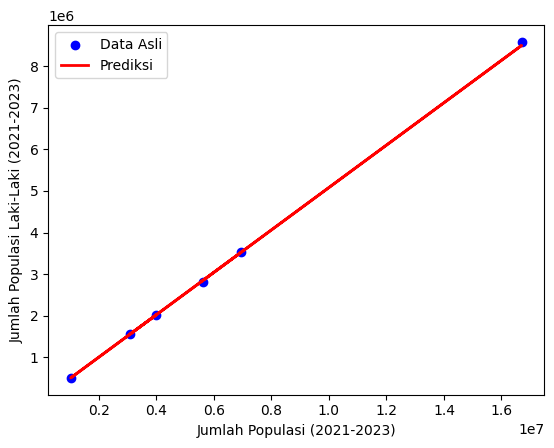

In [ ]:
# Menampilkan plot hasil prediksi vs. data asli
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi')
plt.xlabel('Jumlah Populasi (2021-2023)')
plt.ylabel('Jumlah Populasi Laki-Laki (2021-2023)')
plt.legend()
plt.show()

In [ ]:
# Mengambil data terbaru untuk digunakan sebagai input prediksi
latest_data = df['Laki-Laki dan Perempuan 2021-2023'].iloc[-1]

# Menyiapkan data untuk prediksi tahun 2024 dan 2025
years = np.array([2024, 2025])
predict_data = np.array([latest_data] * len(years)).reshape(-1, 1)

# Melakukan prediksi jumlah penduduk tahun 2024 dan 2025
predictions = model.predict(predict_data)

# Menampilkan hasil prediksi
for i in range(len(years)):
    print("Prediksi jumlah penduduk tahun", years[i], ":", predictions[i])


Prediksi jumlah penduduk tahun 2024 : 302620.47304086
Prediksi jumlah penduduk tahun 2025 : 302620.47304086


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
fig = px.scatter(df, y="Laki-Laki 2021-2023", x="Laki-Laki dan Perempuan 2021-2023", color="Kabupaten/Kota")
fig.update_traces(marker_size=8)

fig.show()

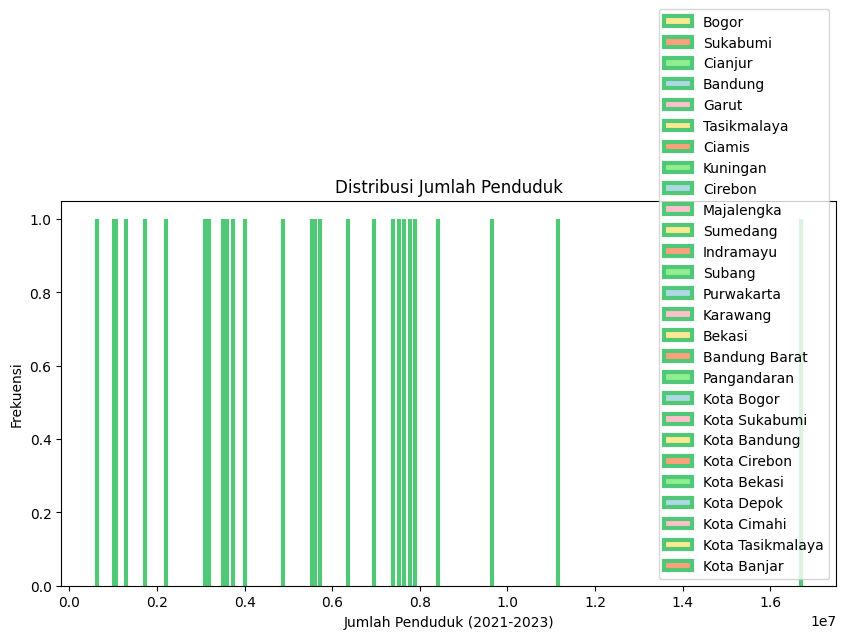

In [ ]:
import matplotlib.pyplot as plt

# Daftar warna untuk setiap kabupaten/kota
colors = ['#FDE992', '#FFA07A', '#90EE90', '#ADD8E6', '#FFC0CB']

fig, ax = plt.subplots(figsize=(10, 5))

# Memisahkan data berdasarkan kabupaten/kota dan membuat histogram untuk setiap kabupaten/kota
for i, kabupaten in enumerate(df["Kabupaten/Kota"].unique()):
    data = df[df["Kabupaten/Kota"] == kabupaten]["Laki-Laki dan Perempuan 2021-2023"]
    ax.hist(data, bins=10, color=colors[i % len(colors)], edgecolor="#50C878", lw=3, label=kabupaten)

plt.title('Distribusi Jumlah Penduduk')
plt.xlabel('Jumlah Penduduk (2021-2023)')
plt.ylabel('Frekuensi')
plt.legend()

plt.show()

In [ ]:
# Mengambil data aktual tahun 2021-2023
actual_data = df['Laki-Laki dan Perempuan 2021-2023']

# Menyiapkan data prediksi tahun 2024-2025
years_pred = np.array([2024, 2025])
predict_data = np.array([latest_data] * len(years_pred)).reshape(-1, 1)

# Melakukan prediksi jumlah penduduk tahun 2024-2025
predictions = model.predict(predict_data)

# Membuat dataframe untuk data aktual dan prediksi
data = {
    'Tahun': np.append(df['Kabupaten/Kota'], years_pred),
    'Laki-Laki dan Perempuan': np.append(actual_data, predictions)
}

df_predictions = pd.DataFrame(data)

print(df_predictions)

               Tahun  Laki-Laki dan Perempuan
0              Bogor             1.670021e+07
1           Sukabumi             8.420030e+06
2            Cianjur             7.628265e+06
3            Bandung             1.115581e+07
4              Garut             7.881205e+06
5        Tasikmalaya             5.718661e+06
6             Ciamis             3.743077e+06
7           Kuningan             3.587961e+06
8            Cirebon             6.945939e+06
9         Majalengka             4.006253e+06
10          Sumedang             3.500864e+06
11         Indramayu             5.615258e+06
12            Subang             4.872911e+06
13        Purwakarta             3.085739e+06
14          Karawang             7.515664e+06
15            Bekasi             9.644591e+06
16     Bandung Barat             5.541035e+06
17       Pangandaran             1.297088e+06
18        Kota Bogor             3.190394e+06
19     Kota Sukabumi             1.069232e+06
20      Kota Bandung             7

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



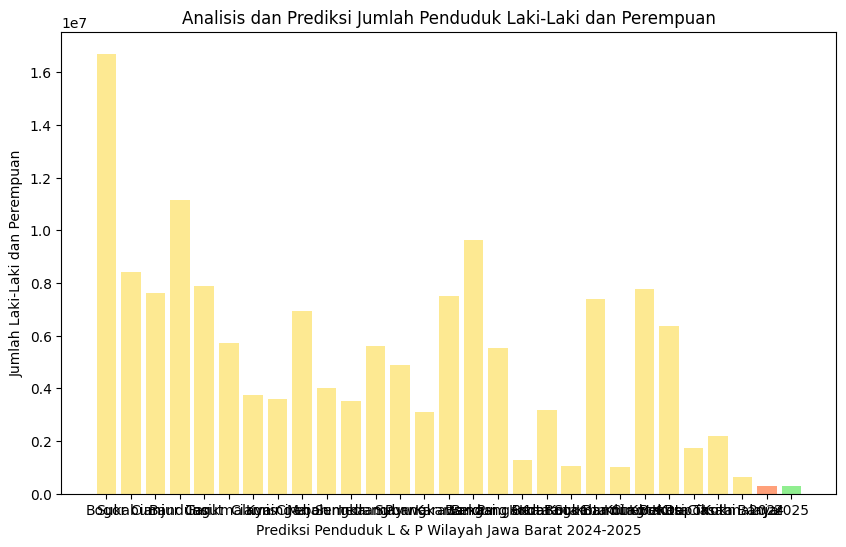

In [ ]:
# Menyiapkan data untuk visualisasi
years_actual = df['Kabupaten/Kota']
actual_data = df['Laki-Laki dan Perempuan 2021-2023']
years_pred = np.array([2024, 2025])
predict_data = np.array([latest_data] * len(years_pred)).reshape(-1, 1)
predictions = model.predict(predict_data)

# Menggabungkan tahun aktual dan tahun prediksi
years = np.append(years_actual, years_pred)

# Menggabungkan data aktual dan data prediksi
data = np.append(actual_data, predictions)

# Mengatur warna untuk data aktual dan data prediksi
colors = ['#FDE992'] * len(years_actual) + ['#FFA07A', '#90EE90']

# Membuat plot
plt.figure(figsize=(10, 6))
plt.bar(years.astype(str), data, color=colors)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Prediksi Penduduk L & P Wilayah Jawa Barat 2024-2025')
plt.ylabel('Jumlah Laki-Laki dan Perempuan')
plt.title('Analisis dan Prediksi Jumlah Penduduk Laki-Laki dan Perempuan')

plt.show()

In [ ]:
# Mengambil data aktual
actual_laki_laki = df['Laki-Laki 2021-2023']
actual_perempuan = df['Perempuan 2021-2023']
actual_total = df['Laki-Laki dan Perempuan 2021-2023']

# Menghitung prediksi untuk data aktual
predictions_laki_laki = model.predict(df[['Laki-Laki 2021-2023']].values.reshape(-1, 1))
predictions_perempuan = model.predict(df[['Perempuan 2021-2023']].values.reshape(-1, 1))
predictions_total = model.predict(df[['Laki-Laki dan Perempuan 2021-2023']].values.reshape(-1, 1))

# Menghitung RMSE untuk data penduduk Laki-Laki
rmse_laki_laki = math.sqrt(mean_squared_error(actual_laki_laki, predictions_laki_laki))

# Menghitung RMSE untuk data penduduk Perempuan
rmse_perempuan = math.sqrt(mean_squared_error(actual_perempuan, predictions_perempuan))

# Menghitung RMSE untuk data penduduk total
rmse_total = math.sqrt(mean_squared_error(actual_total, predictions_total))

print("RMSE Laki-Laki: ", rmse_laki_laki)
print("RMSE Perempuan: ", rmse_perempuan)
print("RMSE Total: ", rmse_total)

RMSE Laki-Laki:  1642395.9220944187
RMSE Perempuan:  1586263.632712717
RMSE Total:  3217743.392061804


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

